In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data / 255.0, mnist.target.astype(int)  # Normalize and convert labels to int

# Function to apply FGSM-like attack (adding uniform noise in one step)
def fgsm_attack(images, epsilon=0.1):
    noise = epsilon * np.sign(np.random.randn(*images.shape))
    adversarial_images = np.clip(images + noise, 0, 1)
    return adversarial_images

# Function to apply PGD-like attack (adding noise iteratively)
def pgd_attack(images, epsilon=0.1, alpha=0.01, iterations=10):
    adversarial_images = np.copy(images)
    for _ in range(iterations):
        noise = alpha * np.sign(np.random.randn(*images.shape))
        adversarial_images = np.clip(adversarial_images + noise, 0, 1)
    return adversarial_images

# Function to add Gaussian noise
def gaussian_noise_attack(images, mean=0, std=0.1):
    noise = np.random.normal(mean, std, images.shape)
    adversarial_images = np.clip(images + noise, 0, 1)
    return adversarial_images



c:\Users\Aspire_Lays\anaconda3\envs\ai\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


KeyboardInterrupt: 

In [21]:
X.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
# Select a few images to visualize
num_images = 4
indices = np.random.choice(len(X), num_images, replace=False)
arr_clean = X.values
clean_images = arr_clean[indices]



In [11]:
# Generate adversarial images
fgsm_images = fgsm_attack(clean_images)
pgd_images = pgd_attack(clean_images)
gaussian_images = gaussian_noise_attack(clean_images)



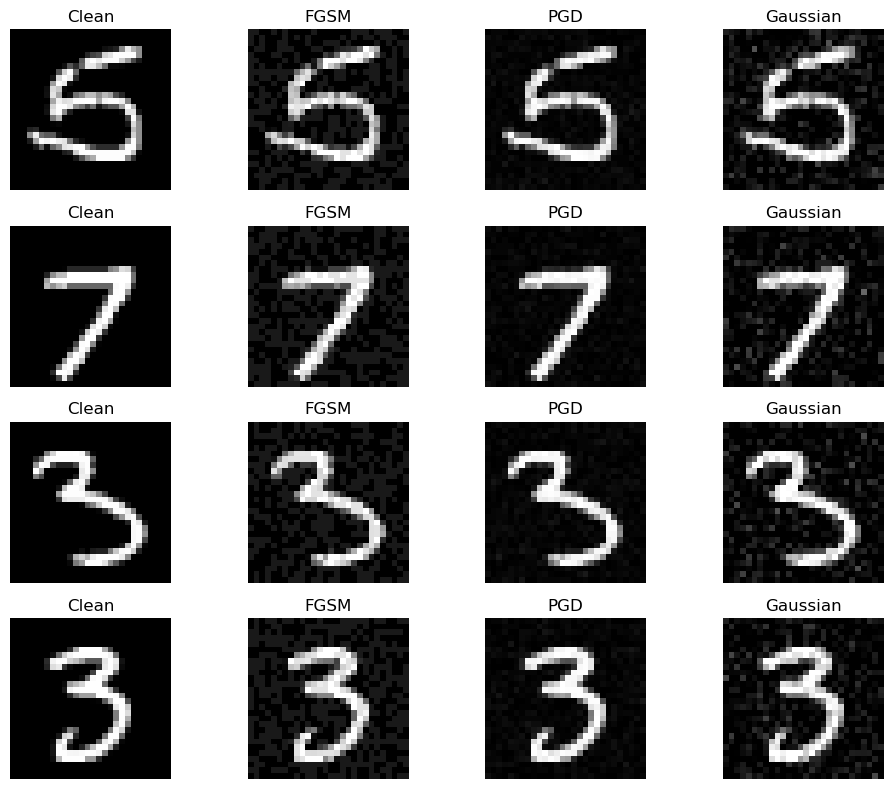

In [ ]:
# Plotting the images side by side
fig, axes = plt.subplots(num_images, 4, figsize=(10, 8))
for i in range(num_images):
    # Plot clean image
    axes[i, 0].imshow(clean_images[i].reshape(28, 28), cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title("Clean")

    # Plot FGSM image
    axes[i, 1].imshow(fgsm_images[i].reshape(28, 28), cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title("FGSM")

    # Plot PGD image
    axes[i, 2].imshow(pgd_images[i].reshape(28, 28), cmap='gray')
    axes[i, 2].axis('off')
    axes[i, 2].set_title("PGD")

    # Plot Gaussian noise image
    axes[i, 3].imshow(gaussian_images[i].reshape(28, 28), cmap='gray')
    axes[i, 3].axis('off')
    axes[i, 3].set_title("Gaussian")

plt.tight_layout()
plt.show()


In [14]:
from sklearn import svm
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model on the original dataset
svm_model = svm.SVC(kernel='rbf', gamma='scale')
svm_model.fit(X_train, y_train)

SVC()

In [15]:
# Evaluate the model on the clean test set
y_pred_clean = svm_model.predict(X_test)
accuracy_clean = accuracy_score(y_test, y_pred_clean)

In [16]:
# Function to apply FGSM-like attack
def fgsm_attack(images, epsilon=0.1):
    noise = epsilon * np.sign(np.random.randn(*images.shape))
    adversarial_images = np.clip(images + noise, 0, 1)
    return adversarial_images

# Function to apply PGD-like attack
def pgd_attack(images, epsilon=0.1, alpha=0.01, iterations=10):
    adversarial_images = np.copy(images)
    for _ in range(iterations):
        noise = alpha * np.sign(np.random.randn(*images.shape))
        adversarial_images = np.clip(adversarial_images + noise, 0, 1)
    return adversarial_images

# Function to add Gaussian noise
def gaussian_noise_attack(images, mean=0, std=0.1):
    noise = np.random.normal(mean, std, images.shape)
    adversarial_images = np.clip(images + noise, 0, 1)
    return adversarial_images


In [17]:

# Apply adversarial attacks to the test set
X_test_fgsm = fgsm_attack(X_test)
X_test_pgd = pgd_attack(X_test)
X_test_gaussian = gaussian_noise_attack(X_test)



In [18]:
# Evaluate the model on the adversarial test sets
y_pred_fgsm = svm_model.predict(X_test_fgsm)
accuracy_fgsm = accuracy_score(y_test, y_pred_fgsm)

y_pred_pgd = svm_model.predict(X_test_pgd)
accuracy_pgd = accuracy_score(y_test, y_pred_pgd)

y_pred_gaussian = svm_model.predict(X_test_gaussian)
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)

# Print the accuracies
print(f"Accuracy on Clean Test Set: {accuracy_clean:.4f}")
print(f"Accuracy on FGSM Attacked Test Set: {accuracy_fgsm:.4f}")
print(f"Accuracy on PGD Attacked Test Set: {accuracy_pgd:.4f}")
print(f"Accuracy on Gaussian Noise Test Set: {accuracy_gaussian:.4f}")



c:\Users\Aspire_Lays\anaconda3\envs\ai\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy on Clean Test Set: 0.9764
Accuracy on FGSM Attacked Test Set: 0.9725
Accuracy on PGD Attacked Test Set: 0.9766
Accuracy on Gaussian Noise Test Set: 0.9744


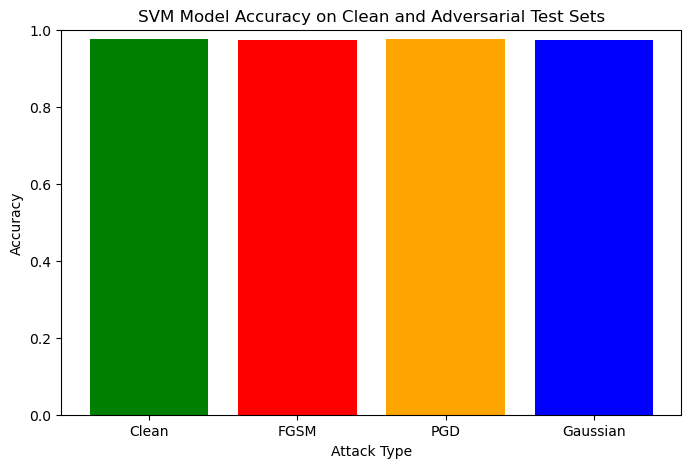

In [19]:
# Visualize the accuracies using a bar chart
attack_types = ['Clean', 'FGSM', 'PGD', 'Gaussian']
accuracies = [accuracy_clean, accuracy_fgsm, accuracy_pgd, accuracy_gaussian]

plt.figure(figsize=(8, 5))
plt.bar(attack_types, accuracies, color=['green', 'red', 'orange', 'blue'])
plt.xlabel('Attack Type')
plt.ylabel('Accuracy')
plt.title('SVM Model Accuracy on Clean and Adversarial Test Sets')
plt.ylim(0, 1)
plt.show()